In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import torch
 
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test

### Read in data from VanAllen et al.

In [2]:
neoag_vanallen = pd.read_excel('nature24473_MOESM4_neoantigens.xlsx', sheet_name='VanAllen et al.')
neoag_vanallen.head()

,ID,MUTATION_ID,Sample,WT.Peptide,MT.Peptide,MT.Allele,WT.Score,MT.Score,HLA
0,1,1_1563747_C_T_Pat02,Pat02,NHREVAQIL,NYREVAQIL,C0702,701,70,"A0201,A2601,B0801,B0702,C0702,C0702"
1,2,1_17087582_G_A_Pat02,Pat02,SPSNDFQVL,SPLNDFQVL,B0801,739,202,"A0201,A2601,B0801,B0702,C0702,C0702"
2,3,1_17087582_G_A_Pat02,Pat02,SPSNDFQVL,SPLNDFQVL,B0702,32,37,"A0201,A2601,B0801,B0702,C0702,C0702"
3,4,1_21806573_A_G_Pat02,Pat02,LLDEKEPEV,LLDEKGPEV,A0201,8,9,"A0201,A2601,B0801,B0702,C0702,C0702"
4,5,1_46073697_C_T_Pat02,Pat02,KPGQEAPVL,KPGQEASVL,B0702,90,31,"A0201,A2601,B0801,B0702,C0702,C0702"


In [3]:
neoag_vanallen.shape

(39437, 9)

#### Look at how many neoantigens called for each patient

In [4]:
neoag_vanallen['Sample'].value_counts()

Pat110    3650
Pat138    3167
Pat38     2503
Pat58     1971
Pat139    1922
          ... 
Pat92       13
Pat67       11
Pat33        8
Pat36        6
Pat18        5
Name: Sample, Length: 110, dtype: int64

In [5]:
survival_vanallen = pd.read_excel('nature24473_MOESM5_survival.xlsx', sheet_name='Survival VanAllen et al.')
survival_vanallen.head()

,Sample,Months,Status
0,Pat02,53.654736,0
1,Pat03,3.287668,1
2,Pat04,32.449280,0
3,Pat06,5.293145,1
4,Pat08,4.602735,1


In [6]:
set(neoag_vanallen['Sample']) - set(survival_vanallen['Sample'])

# seven patients present in neoantigen list but not survival 

{'Pat07', 'Pat105', 'Pat57', 'Pat58', 'Pat63', 'Pat66', 'Pat77'}

In [7]:
set(survival_vanallen['Sample']) - set(neoag_vanallen['Sample'])

set()

In [8]:
survival_vanallen['Months'].describe()

count    103.000000
mean      14.343168
std       13.375048
min        1.117807
25%        4.126023
50%        8.219169
75%       23.210933
max       53.654736
Name: Months, dtype: float64

<AxesSubplot:>

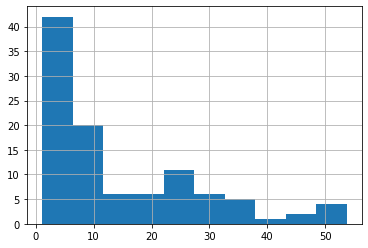

In [9]:
survival_vanallen['Months'].hist()

### Read in data from Snyder et al.

In [10]:
neoag_snyder = pd.read_excel('nature24473_MOESM4_neoantigens.xlsx', sheet_name='Snyder et al.')
neoag_snyder.head()

,ID,MUTATION_ID,Sample,WT.Peptide,MT.Peptide,MT.Allele,WT.Score,MT.Score,HLA
0,1,1_2428342_A_G_CR0095,CR0095,QQKPAQYLR,QQKPAQCLR,A3101,28,105,"A0201,A3101,B3502,B3906,C0401,C0702"
1,2,1_879142_C_G_LSDNR1120,LSDNR1120,LLTNMGLKL,LLSNMGLKL,A0201,618,322,"A0201,A0301,B0801,C0701"
2,3,1_879142_C_G_LSDNR1120,LSDNR1120,HLLTNMGLK,HLLSNMGLK,A0301,19,19,"A0201,A0301,B0801,C0701"
3,4,1_4772564_C_T_NR1867,NR1867,TVSILQTRK,TVSILQTWK,A6801,61,41,"A3402,A6801,B1503,B1574,B1598,C0202,C0210,C0214"
4,5,1_4772564_C_T_NR1867,NR1867,LQTRKTTVA,LQTWKTTVA,B1503,96,262,"A3402,A6801,B1503,B1574,B1598,C0202,C0210,C0214"


In [11]:
neoag_snyder.shape

(26052, 9)

#### Look at how many neoantigens called for each patient

In [12]:
neoag_snyder['Sample'].value_counts()

PR4092     2494
CR4880     1993
CR04885    1864
SD7357     1419
LSD4744    1394
           ... 
NR6689        7
SD5934        7
NR3156        5
SD2051        4
NR6842        3
Name: Sample, Length: 63, dtype: int64

In [13]:
survival_snyder = pd.read_excel('nature24473_MOESM5_survival.xlsx', sheet_name='Survival Snyder et al.')
survival_snyder.head()

,Sample,Months,Status
0,CR0095,67.89041,0
1,CR04885,25.60000,0
2,CR06670,44.40000,0
3,CR1509,53.85205,0
4,CR22640,51.20000,0


In [14]:
survival_snyder.shape

(64, 3)

In [15]:
set(survival_snyder['Sample']) - set(neoag_snyder['Sample'])

# one patient present in survival but not neoantigens

{'NR8727'}

In [16]:
set(neoag_snyder['Sample']) - set(survival_snyder['Sample'])

set()

In [17]:
survival_snyder['Months'].describe()

count    64.000000
mean     32.625835
std      24.525729
min       2.500000
25%      12.501373
50%      25.250000
75%      50.050000
max      94.600000
Name: Months, dtype: float64

<AxesSubplot:>

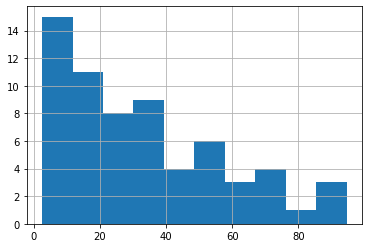

In [18]:
survival_snyder['Months'].hist()

### Read in data from Rizvi et al.

In [19]:
neoag_rizvi = pd.read_excel('nature24473_MOESM4_neoantigens.xlsx', sheet_name='Rizvi et al.')
neoag_rizvi.head()

,ID,MUTATION_ID,Sample,WT.Peptide,MT.Peptide,MT.Allele,WT.Score,MT.Score,HLA
0,1,1_44084332_G_T_AL4602,AL4602,RGTETCGLI,RVTETCGLI,C1502,1208,124,"A0301,A3201,B0801,B5101,C0702,C1502"
1,2,1_56990069_C_A_AL4602,AL4602,IGRLRPHFL,IVRLRPHFL,B0801,305,165,"A0301,A3201,B0801,B5101,C0702,C1502"
2,3,1_152192039_C_A_AL4602,AL4602,SSNGPHGSV,SSNVPHGSV,C1502,73,210,"A0301,A3201,B0801,B5101,C0702,C1502"
3,4,1_158227298_G_T_AL4602,AL4602,ALWFRKRCF,ALWFRKLCF,A3201,547,284,"A0301,A3201,B0801,B5101,C0702,C1502"
4,5,1_159410378_C_G_AL4602,AL4602,NTREHDQLI,NSREHDQLI,C1502,41,42,"A0301,A3201,B0801,B5101,C0702,C1502"


In [20]:
neoag_rizvi.shape

(4948, 9)

#### Look at how many neoantigens called for each patient

In [21]:
neoag_rizvi['Sample'].value_counts()

TU0428      811
HE3202      554
SA9755      501
ZA6505      398
CU9061      246
DI6359      234
SC0899      230
RI1933      217
CA9903      215
FR9547      209
M4945       171
SC6470      112
KA3947      111
Y2087        93
AL4602       93
RH090935     80
RO3338       72
DM123062     65
MA7027       58
R7495        54
SB010944     53
AU5884       48
LO3793       47
JB112852     44
NI9507       38
WA7899       37
BL3403       30
ZA6965       29
LO5004       28
SR070761     26
GR4788       25
GR0134       19
Name: Sample, dtype: int64

In [22]:
len(neoag_rizvi['Sample'].value_counts())

32

In [23]:
survival_rizvi = pd.read_excel('nature24473_MOESM5_survival.xlsx', sheet_name='Survival Rizvi et al.')
survival_rizvi.head()

,Sample,Months,Status
0,SA9755,26.5,0
1,HE3202,30.5,0
2,TU0428,3.7,1
3,Y2087,14.9,1
4,M4945,32.1,0


In [24]:
survival_rizvi.shape

(34, 3)

In [25]:
set(neoag_rizvi['Sample']) - set(survival_rizvi['Sample'])

set()

In [26]:
set(survival_rizvi['Sample']) - set(neoag_rizvi['Sample'])

# two patients present in survival but not neoantigens

{'VA1330', 'VA7859'}

In [27]:
survival_rizvi['Months'].describe()

count    34.000000
mean     19.808824
std      11.125247
min       2.100000
25%      13.775000
50%      22.300000
75%      28.125000
max      43.700000
Name: Months, dtype: float64

<AxesSubplot:>

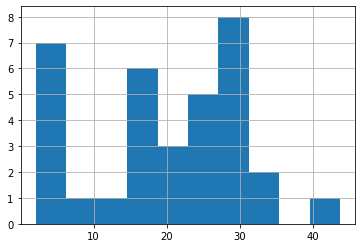

In [28]:
survival_rizvi['Months'].hist()

# Combine Datasets

In [29]:
neoags_full = neoag_rizvi.append(neoag_snyder)
neoags_full = neoags_full.append(neoag_vanallen)
neoags_full

,ID,MUTATION_ID,Sample,WT.Peptide,MT.Peptide,MT.Allele,WT.Score,MT.Score,HLA
0,1,1_44084332_G_T_AL4602,AL4602,RGTETCGLI,RVTETCGLI,C1502,1208,124,"A0301,A3201,B0801,B5101,C0702,C1502"
1,2,1_56990069_C_A_AL4602,AL4602,IGRLRPHFL,IVRLRPHFL,B0801,305,165,"A0301,A3201,B0801,B5101,C0702,C1502"
2,3,1_152192039_C_A_AL4602,AL4602,SSNGPHGSV,SSNVPHGSV,C1502,73,210,"A0301,A3201,B0801,B5101,C0702,C1502"
3,4,1_158227298_G_T_AL4602,AL4602,ALWFRKRCF,ALWFRKLCF,A3201,547,284,"A0301,A3201,B0801,B5101,C0702,C1502"
4,5,1_159410378_C_G_AL4602,AL4602,NTREHDQLI,NSREHDQLI,C1502,41,42,"A0301,A3201,B0801,B5101,C0702,C1502"
...,...,...,...,...,...,...,...,...,...
39432,39433,7_21655905_G_A_Pat98,Pat98,ELRRFAKEI,ELRRFTKEI,B0801,525,213,"A0301,A0101,B0801,B3503,C0701,C0401"
39433,39434,8_75757705_T_C_Pat98,Pat98,SVWRRAVYL,SVWRRAAYL,B0801,696,501,"A0301,A0101,B0801,B3503,C0701,C0401"
39434,39435,8_113331119_G_A_Pat98,Pat98,ILTCRLGER,ILMCRLGER,A0301,3260,339,"A0301,A0101,B0801,B3503,C0701,C0401"
39435,39436,9_107267289_T_G_Pat98,Pat98,HLMVVVLFY,HLMVVGLFY,A0301,32,41,"A0301,A0101,B0801,B3503,C0701,C0401"


In [30]:
survivals = survival_rizvi.append(survival_snyder)
survivals = survivals.append(survival_vanallen)
survivals

,Sample,Months,Status
0,SA9755,26.500000,0
1,HE3202,30.500000,0
2,TU0428,3.700000,1
3,Y2087,14.900000,1
4,M4945,32.100000,0
...,...,...,...
98,Pat86,9.632866,1
99,Pat88,32.515033,0
100,Pat90,33.041060,0
101,Pat92,4.043831,1


In [31]:
survivals = survivals[survivals['Status']!='-']
survivals['Status'].value_counts()

1    132
0     68
Name: Status, dtype: int64

## Survival Curves

### Look at survival for entire cohort

In [32]:
kmf = KaplanMeierFitter()
 
months = survivals['Months']
status = survivals['Status'] 
kmf.fit(months,status)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 200 total observations, 68 right-censored observations>

<AxesSubplot:title={'center':'Kaplan-Meier Survival Curve'}, xlabel='timeline'>

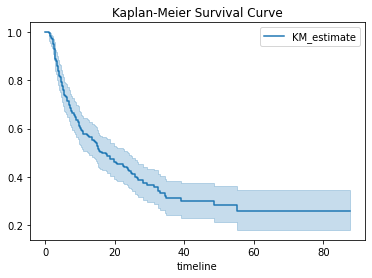

In [33]:
kmf.plot(title='Kaplan-Meier Survival Curve')

### Threshold patients based on length of survival

In [34]:
threshold = []

for patient in survivals['Sample']:
    months = survivals[survivals['Sample']==patient]['Months'].values[0]
    if months > 40:
        threshold.append(1)
    else:
        threshold.append(0)

survivals_thresholded = survivals
survivals_thresholded['40mos'] = threshold

In [35]:
survivals_thresholded

,Sample,Months,Status,40mos
0,SA9755,26.500000,0,0
1,HE3202,30.500000,0,0
2,TU0428,3.700000,1,0
3,Y2087,14.900000,1,0
4,M4945,32.100000,0,0
...,...,...,...,...
98,Pat86,9.632866,1,0
99,Pat88,32.515033,0,0
100,Pat90,33.041060,0,0
101,Pat92,4.043831,1,0


In [36]:
patient_survivals = dict(zip(survivals_thresholded['Sample'], survivals_thresholded['40mos']))
patient_survivals['Pat03']

0

### Separate survival curves based on length of time survived

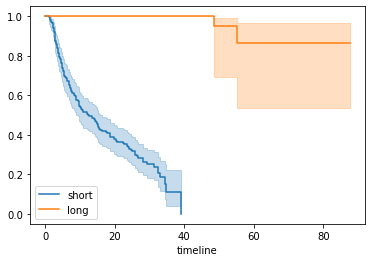

In [37]:
T = survivals_thresholded['Months']
E = survivals_thresholded['Status']

groups = survivals_thresholded['40mos']
ix = (groups == 1)

kmf.fit(T[~ix], E[~ix], label='short')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='long')
ax = kmf.plot_survival_function(ax=ax)

In [38]:
neoags = neoags_full[['Sample', 'MT.Peptide']]
neoags

,Sample,MT.Peptide
0,AL4602,RVTETCGLI
1,AL4602,IVRLRPHFL
2,AL4602,SSNVPHGSV
3,AL4602,ALWFRKLCF
4,AL4602,NSREHDQLI
...,...,...
39432,Pat98,ELRRFTKEI
39433,Pat98,SVWRRAAYL
39434,Pat98,ILMCRLGER
39435,Pat98,HLMVVGLFY


In [39]:
# denote for each peptide whether the patient survived past threshold

peptide_status = []
for s in neoags['Sample']:
    if s in patient_survivals.keys():
        status = patient_survivals[s]
    else:
        status = 'NA'
    peptide_status.append(status)
    
neoags['peptide_status'] = peptide_status
neoags

,Sample,MT.Peptide,peptide_status
0,AL4602,RVTETCGLI,0
1,AL4602,IVRLRPHFL,0
2,AL4602,SSNVPHGSV,0
3,AL4602,ALWFRKLCF,0
4,AL4602,NSREHDQLI,0
...,...,...,...
39432,Pat98,ELRRFTKEI,0
39433,Pat98,SVWRRAAYL,0
39434,Pat98,ILMCRLGER,0
39435,Pat98,HLMVVGLFY,0


In [40]:
neoags = neoags[neoags['peptide_status']!='NA']

### Generate features!

#### AA count and sum of each AA pairing

In [41]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from tqdm import tqdm

aa_list = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

for aa in tqdm(aa_list):
    
    neoags['%s_count' %aa] = 'NA'
    counts = []
    for p in neoags['MT.Peptide']:
        aacount = ProteinAnalysis(p).count_amino_acids()[aa]
        counts.append(aacount)   
    neoags['%s_count' %aa] = counts
    
    for aa2 in aa_list:
        
        neoags['%s+%s_count' % (aa,aa2)] = 'NA'
        sums = []
        for p in neoags['MT.Peptide']:
            aacount = ProteinAnalysis(p).count_amino_acids()[aa]
            aa2count = ProteinAnalysis(p).count_amino_acids()[aa2]
            sums.append(aacount+aa2count)
        neoags['%s+%s_count' % (aa,aa2)] = sums
    
neoags

100%|███████████████████████████████████████████| 20/20 [04:01<00:00, 12.08s/it]


,Sample,MT.Peptide,peptide_status,A_count,A+A_count,A+C_count,A+D_count,A+E_count,A+F_count,A+G_count,...,Y+M_count,Y+N_count,Y+P_count,Y+Q_count,Y+R_count,Y+S_count,Y+T_count,Y+V_count,Y+W_count,Y+Y_count
0,AL4602,RVTETCGLI,0,0,0,1,0,1,0,1,...,0,0,0,0,1,0,2,1,0,0
1,AL4602,IVRLRPHFL,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,1,0,0
2,AL4602,SSNVPHGSV,0,0,0,0,0,0,0,1,...,0,1,1,0,0,3,0,2,0,0
3,AL4602,ALWFRKLCF,0,1,2,2,1,1,3,1,...,0,0,0,0,1,0,0,0,1,0
4,AL4602,NSREHDQLI,0,0,0,0,1,1,0,0,...,0,1,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39432,Pat98,ELRRFTKEI,0,0,0,0,0,2,1,0,...,0,0,0,0,2,0,1,0,0,0
39433,Pat98,SVWRRAAYL,0,2,4,2,2,2,2,2,...,1,1,1,1,3,2,1,2,2,2
39434,Pat98,ILMCRLGER,0,0,0,1,0,1,0,1,...,1,0,0,0,2,0,0,0,0,0
39435,Pat98,HLMVVGLFY,0,0,0,0,0,0,1,1,...,2,1,1,1,1,1,1,3,1,2


In [42]:
neoags['peptide_status'].value_counts()

0    51730
1    15814
Name: peptide_status, dtype: int64

In [43]:
correlations = neoags.loc[:, 'A_count':].corrwith(neoags['peptide_status'].astype('int'))
correlations.sort_values(ascending=False)

R+E_count    0.076265
E+R_count    0.076265
D+R_count    0.074558
R+D_count    0.074558
E+D_count    0.065418
               ...   
L+C_count   -0.057480
P+L_count   -0.059571
L+P_count   -0.059571
L+F_count   -0.068508
F+L_count   -0.068508
Length: 420, dtype: float64

#### Hmmm, looks like all my features have a low correlation with the target :(

### Let's try to train something to predict survival based on the features generated

In [44]:
x = neoags.loc[:, 'A_count':]

ytrue = neoags['peptide_status'].astype('int')

In [45]:
import sklearn
import sklearn.linear_model
import sklearn.metrics

from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

lr = sklearn.linear_model.LogisticRegression(max_iter=1000)
 

In [46]:
lr = lr.fit(x, ytrue)
acc = accuracy_score(ytrue, lr.predict(x))

print(acc)
print(lr.coef_)

0.7658563306881441
[[-2.06067103e-03 -4.12134206e-03 -5.63323524e-03  8.53561019e-04
  -3.15119470e-04 -6.01345382e-03 -3.87784606e-03 -2.10645387e-03
  -4.63074442e-03 -5.44507921e-03 -6.57108035e-03 -3.70465112e-03
  -3.02867345e-03 -5.65124667e-03 -2.76624756e-03  3.05622358e-04
  -3.31763255e-03 -2.22494130e-03 -3.40366692e-03 -3.46596243e-03
  -5.20072862e-03 -3.57256421e-03 -5.63323524e-03 -7.14512843e-03
  -6.58332165e-04 -1.82701265e-03 -7.52534700e-03 -5.38973925e-03
  -3.61834706e-03 -6.14263760e-03 -6.95697240e-03 -8.08297354e-03
  -5.21654430e-03 -4.54056664e-03 -7.16313986e-03 -4.27814075e-03
  -1.20627083e-03 -4.82952573e-03 -3.73683449e-03 -4.91556011e-03
  -4.97785562e-03 -6.71262181e-03  2.91423205e-03  8.53561019e-04
  -6.58332165e-04  5.82846409e-03  4.65978361e-03 -1.03855074e-03
   1.09705701e-03  2.86844920e-03  3.44158660e-04 -4.70176137e-04
  -1.59617728e-03  1.27025196e-03  1.94622962e-03 -6.76343598e-04
   2.20865551e-03  5.28052543e-03  1.65727053e-03  2.7499

#### We get around 77% accuracy in predicting whether a neoantigen would belong to a long survivor

### My original vision had been to accurately predict whether each neoantigen belonged to a "long survivor" or not. Then I would add the number of "survival neoantigens" together for each patient and use that to decide if the person was a long survivor.

### Ultimately that didn't work out, so I've decided to threshold on the number of neoantigens called for each patient. At least I generated features for the heck of it!

# Let's just use number of neoantigens

In [47]:
neoag_counts = []

for patient in survivals_thresholded['Sample']:
    count = sum(neoags.Sample == patient)
    neoag_counts.append(count)
    
survivals_thresholded['numNeoags'] = neoag_counts
survivals_thresholded

,Sample,Months,Status,40mos,numNeoags
0,SA9755,26.500000,0,0,501
1,HE3202,30.500000,0,0,554
2,TU0428,3.700000,1,0,811
3,Y2087,14.900000,1,0,93
4,M4945,32.100000,0,0,171
...,...,...,...,...,...
98,Pat86,9.632866,1,0,38
99,Pat88,32.515033,0,0,717
100,Pat90,33.041060,0,0,115
101,Pat92,4.043831,1,0,13


In [48]:
survivals_thresholded['numNeoags'].describe()

count     200.000000
mean      337.720000
std       531.027365
min         0.000000
25%        46.500000
50%       148.500000
75%       395.000000
max      3650.000000
Name: numNeoags, dtype: float64

I choose to threshold the number of neoantigens at 100; even though the median is around 150, I found the p-value was better with the threshold set to 100. Setting to 50 also increased the p-value so 100 it was.

In [49]:
neoag_threshold = []

for patient in survivals_thresholded['Sample']:
    num = survivals_thresholded[survivals_thresholded['Sample']==patient]['numNeoags'].values[0]
    if num > 100:
        t = 1
    else:
        t = 0
    neoag_threshold.append(t)
    
survivals_thresholded['neoagThrshld'] = neoag_threshold
survivals_thresholded

,Sample,Months,Status,40mos,numNeoags,neoagThrshld
0,SA9755,26.500000,0,0,501,1
1,HE3202,30.500000,0,0,554,1
2,TU0428,3.700000,1,0,811,1
3,Y2087,14.900000,1,0,93,0
4,M4945,32.100000,0,0,171,1
...,...,...,...,...,...,...
98,Pat86,9.632866,1,0,38,0
99,Pat88,32.515033,0,0,717,1
100,Pat90,33.041060,0,0,115,1
101,Pat92,4.043831,1,0,13,0


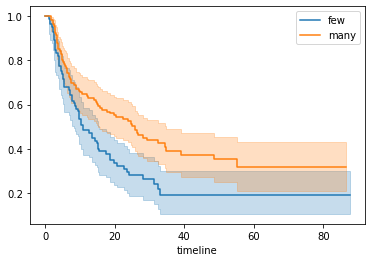

In [50]:
T = survivals_thresholded['Months']
E = survivals_thresholded['Status']

groups = survivals_thresholded['neoagThrshld']
ix = (groups == 1)

kmf.fit(T[~ix], E[~ix], label='few')
ax = kmf.plot_survival_function()

kmf.fit(T[ix], E[ix], label='many')
ax = kmf.plot_survival_function(ax=ax)

In [51]:
from lifelines.statistics import logrank_test

results = logrank_test(
    T[~ix], 
    T[ix],
    event_observed_A=E[~ix], 
    event_observed_B=E[ix])


print("logrank p-value = %f" % results.p_value)  

logrank p-value = 0.003218


## Yay, a decently separated survival curve with a significant difference (p=0.003) between groups! Given that this was modeled only on the number of neoantigens, this demonstrates the randomness and fallability of such methods. The number of neoantigens called for a patient is dependent on a plethora of variables from sample preparation to bioinformatics methods used, and may not reflect biological truth.

## This was a valuable exercise in learning how many different ways one can arrive at 'significance'!